Handwritten Digit Classification

In [4]:
pip install tensorflow matplotlib


^C
Note: you may need to restart the kernel to use updated packages.


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8660 - loss: 0.4723 - val_accuracy: 0.9561 - val_loss: 0.1527
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9616 - loss: 0.1319 - val_accuracy: 0.9674 - val_loss: 0.1137
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9733 - loss: 0.0918 - val_accuracy: 0.9709 - val_loss: 0.0957
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9821 - loss: 0.0615 - val_accuracy: 0.9701 - val_loss: 0.0973
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9854 - loss: 0.0494 - val_accuracy: 0.9734 - val_loss: 0.0888


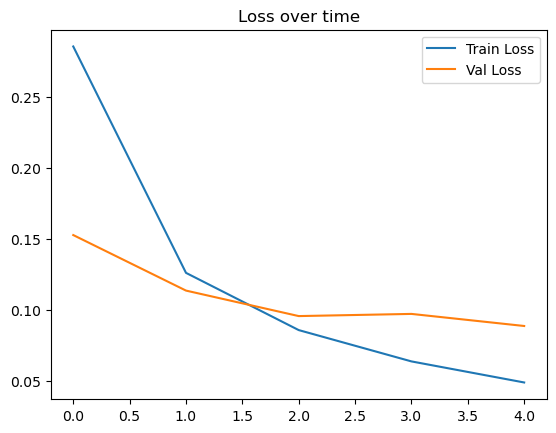

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9733 - loss: 0.0923
Test Accuracy: 97.59%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


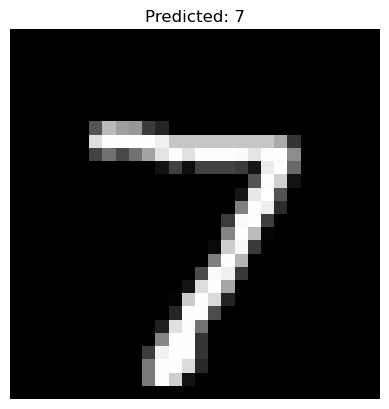

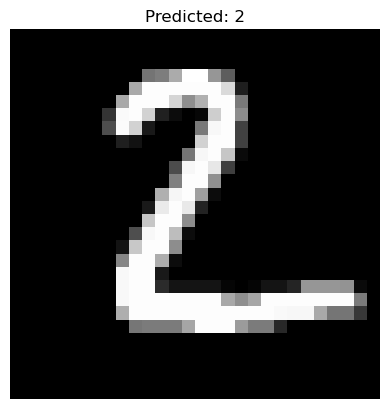

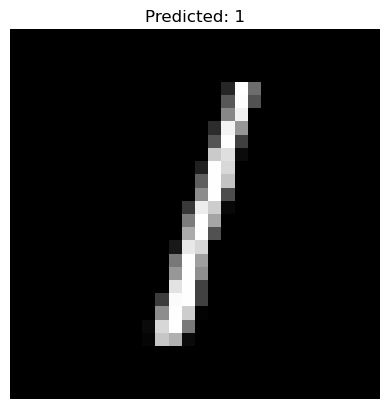

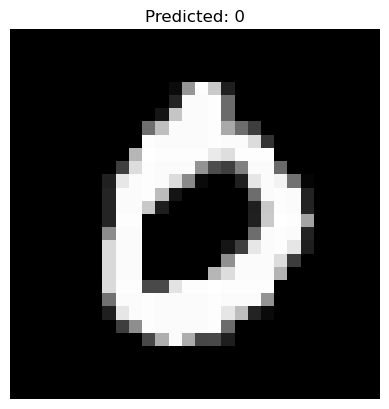

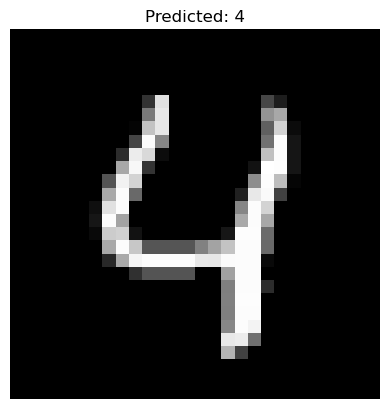

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28*28) / 255.0  
X_test = X_test.reshape(-1, 28*28) / 255.0

y_train = to_categorical(y_train, 10)  
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,))) 
model.add(Dense(10, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over time')
plt.show()

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

predictions = model.predict(X_test)
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()
